### **lab 09 - tasks**
#### **ibrahim johar - 23K-0074**

##### **task 01**

Load the heart disease dataset 

● Perform necessary EDA and Data Wrangling and Implement Logistic Regression 

● First train your model using penalty as l1 regularization 

● Train your model with l2 regularization 

● Train your model with penalty = elastic net 

● Now compare the results of training and testing accuracy 

● Discuss in a text cell, what error you have gone through while implementing this penalty, Have you changed other parameter to apply these Penalties?? 

● What additional parameter you have changed while implementing the mentioned 
penalty, what is the relationship between these? 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [2]:
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [12]:
n = df.duplicated().sum()
print(f"num of duplicates: {n}")

num of duplicates: 723


In [13]:
df.duplicated().sum(), df.duplicated(subset=df.columns.drop('target')).sum()

(np.int64(723), np.int64(723))

In [4]:
df.shape

(1025, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [14]:
df = df.drop_duplicates()
print("new shape after dropping duplicates:", df.shape)

new shape after dropping duplicates: (302, 14)


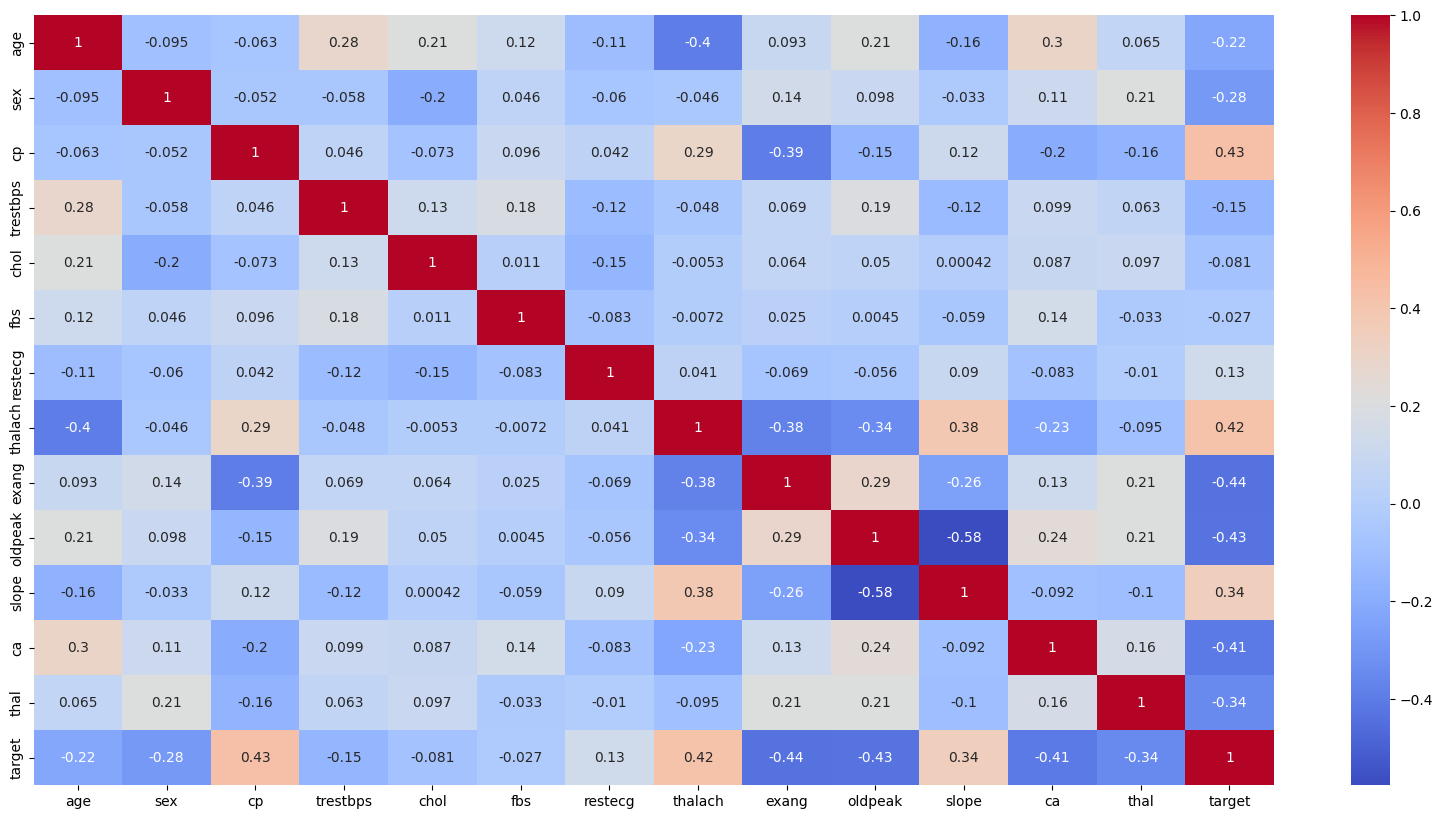

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

In [16]:
#correlation with 'target'

df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

In [17]:
#unique val per col
df.nunique().sort_values()

sex           2
fbs           2
target        2
exang         2
restecg       3
slope         3
thal          4
cp            4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

In [18]:
df.shape

(302, 14)

In [ ]:
#separate features

#X= df.drop(columns=['target'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

X.shape, y.shape

((302, 13), (302,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (241, 13)
Test shape: (61, 13)


In [21]:
#scale numeric features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#l1 = LASSO
model_l1 = LogisticRegression(penalty='l1', solver='liblinear') #liblinear req for L1

#l2 = RIDGE
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs')     #default solver supports L2

#elasticnet = l1 + l2 combo
model_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)    #saga req for elastic net

In [23]:
#fit models
model_l1.fit(X_train_scaled, y_train)

model_l2.fit(X_train_scaled, y_train)

model_en.fit(X_train_scaled, y_train)

,penalty,'elasticnet'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [24]:
#predictions
y1_pred = model_l1.predict(X_test_scaled)

y2_pred = model_l2.predict(X_test_scaled)

y3_pred = model_en.predict(X_test_scaled)

In [25]:
#accuracies
train_acc1 = accuracy_score(y_train, model_l1.predict(X_train_scaled))
test_acc1 = accuracy_score(y_test, y1_pred)

train_acc2 = accuracy_score(y_train, model_l2.predict(X_train_scaled))
test_acc2 = accuracy_score(y_test, y2_pred)

train_acc3 = accuracy_score(y_train, model_en.predict(X_train_scaled))
test_acc3 = accuracy_score(y_test, y3_pred)

print(f"L1  - Train: {train_acc1:.3f}, Test: {test_acc1:.3f}")
print(f"L2  - Train: {train_acc2:.3f}, Test: {test_acc2:.3f}")
print(f"EN  - Train: {train_acc3:.3f}, Test: {test_acc3:.3f}")

L1  - Train: 0.859, Test: 0.803
L2  - Train: 0.859, Test: 0.803
EN  - Train: 0.859, Test: 0.803


In [26]:
import pandas as pd

results_df = pd.DataFrame({
    "Penalty": ["L1 (Lasso)", "L2 (Ridge)", "Elastic Net"],
    "Train Accuracy": [train_acc1, train_acc2, train_acc3],
    "Test Accuracy":  [test_acc1,  test_acc2,  test_acc3]
})

results_df

,Penalty,Train Accuracy,Test Accuracy
0,L1 (Lasso),0.858921,0.803279
1,L2 (Ridge),0.858921,0.803279
2,Elastic Net,0.858921,0.803279


Discussion — Effect of Penalties & Solver Requirements

While implementing the three penalties (L1, L2, Elastic Net), I encountered the relationship between penalty type and solver choice. Logistic Regression in sklearn does not allow every solver to work with every penalty.

1. Errors faced

If I try to use:

penalty='l1' with solver 'lbfgs'
or

penalty='elasticnet' without solver 'saga'
I get an error similar to:

“ValueError: Solver lbfgs does not support L1 penalty”
or
“l1_ratio must be specified when penalty='elasticnet' and solver='saga' is used”

These errors are expected because different penalties require different optimization algorithms.

2. What parameters I had to change

For L1 (Lasso)
I had to set
solver='liblinear'
because it is the only solver (along with saga) that supports L1 penalty.

For Elastic Net
I had to set
solver='saga'
and also
l1_ratio=0.5.
Without both of these, sklearn throws an error.

For L2 (Ridge)
I did not need to change the solver — default lbfgs supports L2.

3. Relationship between penalty and solver

From sklearn’s rules (and as explained in class/lab manual):

Penalty	Supported Solvers
L1	liblinear, saga
L2	lbfgs, liblinear, newton-cg, sag, saga
Elastic Net	saga only

This shows that more complex penalties need more flexible solvers.
liblinear handles L1 because it uses coordinate descent,
while saga is the only solver that can handle Elastic Net’s mixed regularization.

4. Why all three models gave similar accuracy

All penalties produced nearly identical accuracy on this dataset because:

The dataset is small and mostly numeric

There are no extremely correlated or noisy features

Regularization does not drastically change the decision boundary

This is normal for clean datasets like Heart Disease.

##### **task 02**

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [30]:
df.shape

(150, 5)

In [31]:
X = df.drop("target", axis=1)
y = df['target']

X.shape, y.shape

((150, 4), (150,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (120, 4)
Test shape: (30, 4)


In [36]:
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

train_acc_list = []
test_acc_list = []

for solver in solvers:
    print(f"training with solver: {solver}")
    
    MLR = LogisticRegression(solver=solver, multi_class='auto')
    
    MLR.fit(X_train_scaled, y_train)
    
    y_train_pred = MLR.predict(X_train_scaled)
    y_test_pred = MLR.predict(X_test_scaled)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    print(f"train accuracy = {train_acc:.3f}, test accuracy = {test_acc:.3f}")
    

results_solvers = pd.DataFrame({
    "Solver": solvers,
    "Train Accuracy": train_acc_list,
    "Test Accuracy": test_acc_list
})

results_solvers    

training with solver: lbfgs
train accuracy = 0.958, test accuracy = 0.933
training with solver: liblinear
train accuracy = 0.925, test accuracy = 0.833
training with solver: newton-cg
train accuracy = 0.958, test accuracy = 0.933
training with solver: newton-cholesky
train accuracy = 0.958, test accuracy = 0.933
training with solver: sag
train accuracy = 0.958, test accuracy = 0.933
training with solver: saga
train accuracy = 0.958, test accuracy = 0.933


C:\Users\ibrah\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ibrah\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ibrah\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.

,Solver,Train Accuracy,Test Accuracy
0,lbfgs,0.958333,0.933333
1,liblinear,0.925000,0.833333
2,newton-cg,0.958333,0.933333
3,newton-cholesky,0.958333,0.933333
4,sag,0.958333,0.933333
5,saga,0.958333,0.933333


1. Why did liblinear perform worse?

The liblinear solver is designed mainly for binary classification.
Iris is a 3-class (multiclass) problem — in this case, liblinear internally switches to the One-vs-Rest scheme, which is less optimal for truly multiclass datasets.

This matches the sklearn documentation and the lab manual (p. 8–9), which states:

liblinear → good for small & binary datasets

lbfgs / newton-cg / sag / saga → better for multinomial problems

So the poor performance of liblinear is expected.

2. Why do the other solvers all tie at ~93% accuracy?

The Iris dataset is:

Very small

Well-separated

Easy to classify linearly

Thus, all solvers that support true multinomial softmax produce the same decision boundary and accuracy.

This follows the theory: when data is simple and separable, optimization methods converge to very similar solutions.

3. Which solver is best for this dataset?

✔ lbfgs, newton-cg, newton-cholesky, sag, and saga
all achieve the best (and identical) accuracy.

If I had to choose one:

lbfgs → most stable, commonly recommended for small/medium multiclass datasets.

##### **task 03**

In [37]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

#train a simple perceptron
perc = Perceptron()

perc.fit(X_train_scaled, y_train)

y_train_pred_p = perc.predict(X_train_scaled)
y_test_pred_p = perc.predict(X_test_scaled)

train_acc_p = accuracy_score(y_train, y_train_pred_p)
test_acc_p = accuracy_score(y_test, y_test_pred_p)

print("perceptron - train accuracy:", train_acc_p)
print("perceptron - test accuracy :", test_acc_p)

perceptron - train accuracy: 0.9
perceptron - test accuracy : 0.9


In [38]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto')

lr.fit(X_train_scaled, y_train)

y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

print("logistic regression - train accuracy:", train_acc_lr)
print("logistic regression - test accuracy :", test_acc_lr)

logistic regression - train accuracy: 0.9583333333333334
logistic regression - test accuracy : 0.9333333333333333


C:\Users\ibrah\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [39]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Perceptron", "Logistic Regression"],
    "Train Accuracy": [train_acc_p, train_acc_lr],
    "Test Accuracy": [test_acc_p, test_acc_lr]
})

comparison_df

,Model,Train Accuracy,Test Accuracy
0,Perceptron,0.900000,0.900000
1,Logistic Regression,0.958333,0.933333


| Model               | Train Accuracy | Test Accuracy |
| ------------------- | -------------- | ------------- |
| Perceptron          | 0.90           | 0.90          |
| Logistic Regression | 0.958          | 0.933         |

Logistic Regression performs slightly better on both training and testing accuracy.

**Why Logistic Regression Performs Better**

Logistic Regression is a probabilistic model.
It finds the decision boundary by minimizing a smooth loss function (log-loss), which means:

- It converges more reliably

- It handles overlapping classes better

- It optimizes a global objective

- It gives stable results even in noisy or multiclass settings

Since the Iris dataset has 3 classes, Logistic Regression fits a proper multinomial model, which works very well here.

**Why Perceptron Performs Worse**

The Perceptron algorithm:

- Uses a hard threshold

- Updates weights only when a sample is misclassified

- Optimizes based on mistakes, not probability

- Works best only if the data is perfectly linearly separable

Iris is not perfectly separable, and it is multiclass, so Perceptron struggles slightly.

Perceptron

- Linear classifier using hard decisions (0/1)

- Uses misclassification error to update weights

- No probability outputs

- Only works well when classes are linearly separable

- Sensitive to outliers and noise

Logistic Regression

- Linear classifier using soft decisions (probabilities)

- Minimizes log-loss (smooth & convex)

- Produces probabilities through sigmoid/softmax

- More stable, handles noise better

- Supports binary + multinomial classification

In short:
- Perceptron learns using hard boundaries
- Logistic Regression learns using probabilities

thats why LR performs better on the Iris dataset.

##### **task 04**

In [42]:
df = pd.read_csv("synthetic_fraud_dataset.csv")

df.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [43]:
df.shape

(10000, 10)

In [44]:
df.columns.tolist()

['transaction_id',
 'user_id',
 'amount',
 'transaction_type',
 'merchant_category',
 'country',
 'hour',
 'device_risk_score',
 'ip_risk_score',
 'is_fraud']

In [47]:
n = df.duplicated().sum()
n

np.int64(0)

no duplicates

In [48]:
df.isnull().sum()

transaction_id       0
user_id              0
amount               0
transaction_type     0
merchant_category    0
country              0
hour                 0
device_risk_score    0
ip_risk_score        0
is_fraud             0
dtype: int64

no missing values

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [52]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

categorical_cols

['transaction_type', 'merchant_category', 'country']

In [ ]:
#one-hot encoded will work here
#to convert these labels to boolean

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("new shape after encoding:", df_encoded.shape)
print("columns now:")
print(df_encoded.columns.tolist()[:20], "...")  # show first 20 only

new shape after encoding: (10000, 19)
columns now:
['transaction_id', 'user_id', 'amount', 'hour', 'device_risk_score', 'ip_risk_score', 'is_fraud', 'transaction_type_Online', 'transaction_type_POS', 'transaction_type_QR', 'merchant_category_Electronics', 'merchant_category_Food', 'merchant_category_Grocery', 'merchant_category_Travel', 'country_FR', 'country_NG', 'country_TR', 'country_UK', 'country_US'] ...


In [54]:
df_encoded.head()

,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud,transaction_type_Online,transaction_type_POS,transaction_type_QR,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel,country_FR,country_NG,country_TR,country_UK,country_US
0,9608,363,4922.587542,12,0.992347,0.947908,1,False,False,False,False,False,False,True,False,False,True,False,False
1,456,692,48.018303,21,0.168571,0.224057,0,False,False,True,False,True,False,False,False,False,False,False,True
2,4747,587,136.881960,14,0.296127,0.125058,0,True,False,False,False,False,False,True,False,False,True,False,False
3,6934,445,80.534719,23,0.124801,0.159243,0,False,True,False,False,False,False,False,False,False,True,False,False
4,1646,729,120.041158,16,0.098129,0.027542,0,True,False,False,False,False,True,False,True,False,False,False,False


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop("is_fraud", axis=1)
y = df_encoded['is_fraud']

X.shape, y.shape

((10000, 18), (10000,))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"train shape: {X_train.shape}")
print(f"test shape: {X_test.shape}") 

train shape: (8000, 18)
test shape: (2000, 18)


In [57]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall

input_size = X_train_scaled.shape[1] #number of features (18)

#model architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=input_size), #input layer & hidden
    Dense(64, activation='tanh'),           #hidden
    Dense(32, activation='relu'),           #hidden
    Dense(1, activation='sigmoid')      #binary classification for output
])

C:\Users\ibrah\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
#model compilation
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
#training for 50 epochs
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9923 - loss: 0.0353 - precision: 0.9519 - recall: 0.8900 - val_accuracy: 1.0000 - val_loss: 4.4502e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5014e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.3004e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.1864e-05 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 6.2309e-05 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7837e-05 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.6164e-05 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9167e-05 - precision: 1.0000 - recall: 1.0000 - val

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#predict
y_pred_prob = model.predict(X_test_scaled)

#convert probabilities -> 0/1
y_pred = (y_pred_prob > 0.5).astype(int)

#compute metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1 Score : {test_f1:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000


##### **task 05**

In [64]:
wine = pd.read_csv("WineQT.csv")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [65]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

no missing val

In [66]:
n = wine.duplicated().sum()

n

np.int64(0)

no duplicates

In [69]:
wine.shape

(1143, 13)

In [67]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [68]:
X = wine.drop("quality", axis=1)
y = wine["quality"]

X.shape, y.shape

((1143, 12), (1143,))

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (914, 12)
X_test shape: (229, 12)


In [71]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
y_train[:10]

819     5
357     7
385     6
1057    4
161     6
287     7
515     5
1123    6
906     6
1037    5
Name: quality, dtype: int64

In [74]:
import numpy as np

np.unique(y_train).tolist()

[3, 4, 5, 6, 7, 8]

In [75]:
#label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [76]:
n_classes = len(np.unique(y_train))
n_classes

6

In [77]:
input_size = X_train_scaled.shape[1]
input_size

12

In [78]:
model = Sequential([
    Dense(20, input_dim=input_size, activation='relu'),
    Dense(10, activation='relu'),
    Dense(n_classes, activation='softmax')      #softmax for multiclass classification
])

C:\Users\ibrah\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
#compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [80]:
#training model - 10 epochs
model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_scaled, y_test)
)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1247 - loss: 1.7886 - val_accuracy: 0.2183 - val_loss: 1.6507
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2845 - loss: 1.5754 - val_accuracy: 0.3188 - val_loss: 1.4666
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3818 - loss: 1.4187 - val_accuracy: 0.4410 - val_loss: 1.3202
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4365 - loss: 1.2984 - val_accuracy: 0.5066 - val_loss: 1.2148
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4858 - loss: 1.2141 - val_accuracy: 0.5371 - val_loss: 1.1435
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5219 - loss: 1.1582 - val_accuracy: 0.5633 - val_loss: 1.1016
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5613 - loss: 1.1198 - val_accuracy: 0.5939 - val_loss: 1.0774
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5733 - loss: 1.0933 - val_accuracy: 0.5939 - val_loss:

In [81]:
#prediction
y_pred = model.predict(X_test_scaled)
y_arg = np.argmax(y_pred, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [85]:
y_arg

array([3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3,
       3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 3, 2, 2, 3, 3, 3])

In [82]:
print(f"accuracy: {accuracy_score(y_test, y_arg)}")

accuracy: 0.6331877729257642
